In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from c_PatchDataset import PatchDataset
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
batch_size = 16

data_dir = 'C:/Users/david/MT_code/data/extracted_patches/mutants_tensors'
labels_file = 'C:/Users/david/MT_code/data/fitness_dict_1500.npy'

In [3]:
data_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.ConvertImageDtype(torch.double)])

#label_transforms = transforms.Compose(
#    [transforms.ToTensor(),
#     transforms.ConvertImageDtype(torch.double)])

In [4]:
dataset = PatchDataset(labels_file = labels_file, data_dir = data_dir, 
                        transform = data_transforms)#, target_transform=label_transforms)

In [5]:
trainset, testset = torch.utils.data.random_split(dataset, [1200, 300])

In [6]:
trainloader = DataLoader(dataset = trainset, batch_size= batch_size, shuffle = True)
testloader = DataLoader(dataset = testset, batch_size= batch_size, shuffle = True)

In [11]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()                                                           #image is (16*72*10)
        self.conv = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(1,1))   #image stays (16*72*10)                                   
        self.fc = nn.Linear(16*72*10, 1)                                        

    def forward(self, x):
        x = F.relu(self.conv(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc(x)
        return x


model = ConvNet()
model.double()

ConvNet(
  (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  (fc): Linear(in_features=11520, out_features=1, bias=True)
)

In [12]:
num_epochs = 100
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)#, momentum=0.9)

### Training the model: 

epoch 1, loss 0.972894
epoch 1, loss 4.996826
epoch 1, loss 0.949203
epoch 1, loss 2.183498
epoch 1, loss 1.809607
epoch 1, loss 0.431717
epoch 1, loss 1.881793
epoch 1, loss 0.620862
epoch 1, loss 1.476233
epoch 1, loss 0.673250
epoch 1, loss 0.485098
epoch 1, loss 0.690809
epoch 1, loss 1.242168
epoch 1, loss 1.481370
epoch 1, loss 1.657654
epoch 1, loss 0.569634
epoch 1, loss 2.412452
epoch 1, loss 0.574286
epoch 1, loss 0.403355
epoch 1, loss 1.062052
epoch 1, loss 1.170025
epoch 1, loss 1.065243
epoch 1, loss 0.981523
epoch 1, loss 1.044379
epoch 1, loss 0.983737
epoch 1, loss 1.424375
epoch 1, loss 1.528840
epoch 1, loss 0.743404
epoch 1, loss 0.585556
epoch 1, loss 3.711684
epoch 1, loss 1.410243
epoch 1, loss 1.509871
epoch 1, loss 0.883253
epoch 1, loss 0.990485
epoch 1, loss 0.866095
epoch 1, loss 0.598226
epoch 1, loss 1.071755
epoch 1, loss 2.175722
epoch 1, loss 0.584510
epoch 1, loss 2.774250
epoch 1, loss 0.751462
epoch 1, loss 1.265851
epoch 1, loss 1.628829
epoch 1, lo

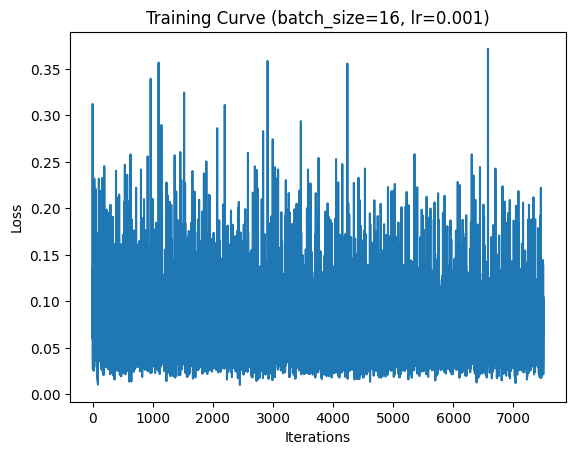

In [13]:
iters, losses = [], []

n=0
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)

        #print(outputs.shape)
        #print(labels.shape)
        outputs = outputs.view(len(inputs))
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f'epoch {epoch + 1}, loss {loss:f}')
        iters.append(n)
        losses.append(float(loss)/batch_size) # compute *average* loss
        n +=1

print('Finished Training')

# plotting
plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate)) 
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [14]:
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)